In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [2]:
#generator
train_ds=keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/nm_ma/Desktop/dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (64, 64),
    )

validation_ds=keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/nm_ma/Desktop/dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (64, 64),
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
#Normalization
def process(image , label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding= 'valid' ,activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding= 'valid' ,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


C:\Users\nm_ma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,177 (1.61 MB)

 Trainable params: 421,985 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [6]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
history = model.fit(train_ds,epochs=5, validation_data=validation_ds)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 423ms/step - accuracy: 0.6410 - loss: 0.6980 - val_accuracy: 0.5548 - val_loss: 1.2423
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 423ms/step - accuracy: 0.7698 - loss: 0.4839 - val_accuracy: 0.7298 - val_loss: 0.5478
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 149s 446ms/step - accuracy: 0.8133 - loss: 0.4071 - val_accuracy: 0.7606 - val_loss: 0.5163
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 344ms/step - accuracy: 0.8524 - loss: 0.3318 - val_accuracy: 0.7780 - val_loss: 0.5044
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 116s 369ms/step - accuracy: 0.8923 - loss: 0.2599 - val_accuracy: 0.7894 - val_loss: 0.5260


In [8]:
# model.save('model.h5')

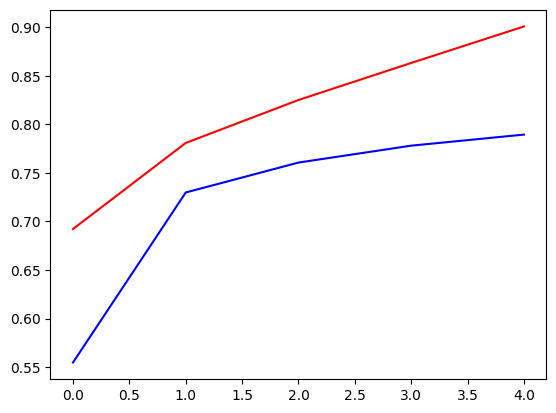

In [9]:
plt.plot(history.history['accuracy'],color='r', label='accuracy')
plt.plot(history.history['val_accuracy'],color='b', label='val_accuracy')

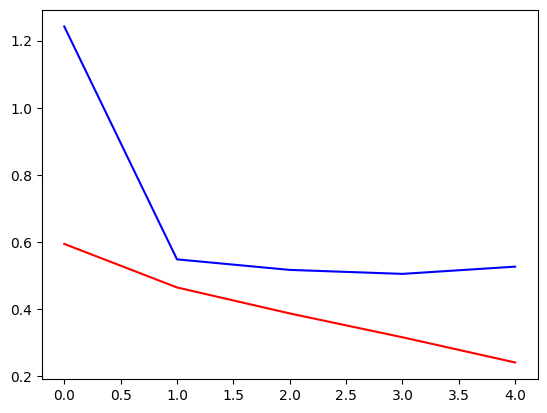

In [10]:
plt.plot(history.history['loss'],color='r', label='loss')
plt.plot(history.history['val_loss'],color='b', label='val_loss')

In [11]:
model.save('model.keras')

# Testing the model

In [12]:
import cv2

In [13]:
img = cv2.imread('dog.jpeg')

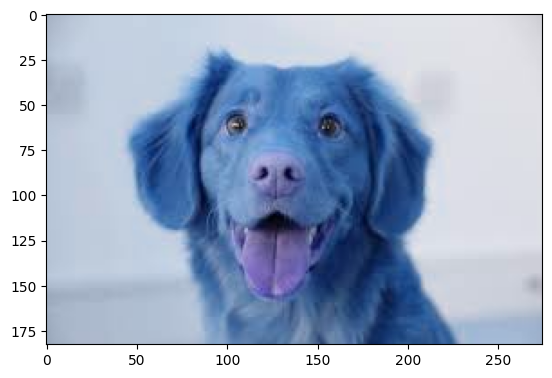

In [14]:
plt.imshow(img)

In [15]:
img.shape

(183, 275, 3)

In [16]:
img = cv2.resize(img,(64,64))

In [17]:
img = np.reshape(img,[1,64,64,3])

In [18]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


array([[1.]], dtype=float32)